# Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

#### Regression can be used for:

1. Forecasting the effects or impact of specific changes. For example, if a manufacturing company wants to forecast how many units of a particular product they need to produce in order to meet the current demand.
 
2. Forecasting trends and future values. For example, how much will the stock price of  Lufthansa be in 6 months from now?
 
3. Determining the strength of different predictors—or, in other words, assessing how much of an impact the independent variable(s) has on a dependent variable. For example, if a soft drinks company is sponsoring a football match, they might want to determine if the ads being displayed during the match have accounted for any increase in sales.

# Methodology

1. Importing Libraries necessary for the project.
2. Reading Training and Testing Data.
3. Analyzing Data, its columns and types.
4. Dropping columns which are not optimal for training the model.
5. Visualizong Data using bar graphs, scatterplots and heatmaps.
6. Data Cleaning(Filling null entries).
7. Extracting features nd label from the Data Frame.
8. Training and Testing Data using only Training Data.
9. Predicting label for testing Dat after getting satisfactory results on Training Data.
10. Conclusion

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
%matplotlib inline

## Reading Data from .csv format in th DataFrame

In [2]:
Train_Data = pd.read_csv('train.csv')
Test_Data = pd.read_csv('test.csv')

## Analyzing Data, its columns and Data Types.

In [3]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [4]:
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,S


## Removing features that are not required for the predicting Target Value and dropping any rows with null values.

In [5]:
Train_Data = Train_Data.drop(['Name', 'PassengerId', 'Ticket','Cabin','Embarked','Fare'], axis = 1)
Test_Data = Test_Data.drop(['Name', 'PassengerId', 'Ticket','Cabin','Embarked','Fare'], axis = 1)


Train_Data = Train_Data.dropna(axis = 'index', how = 'any')

In [6]:
Train_Data.info()
Train_Data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null int64
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
dtypes: float64(1), int64(5)
memory usage: 39.0 KB


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,2,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,2,35.0,0,0


## Looking at columns more closely.

In [7]:
for col in Train_Data.columns:
    print(col,Train_Data[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex [2 1]
Age [22.   38.   26.   35.   54.    2.   27.   14.    4.   58.   20.   39.
 55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
SibSp [1 0 3 4 2 5]
Parch [0 1 2 5 3 4 6]


# Visualizing Relation of Individual Feature with Target Variable.

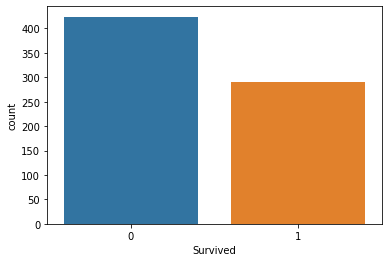

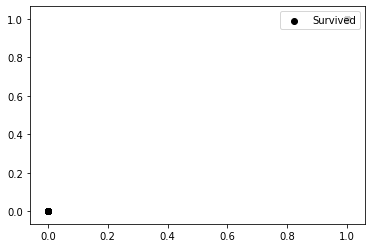

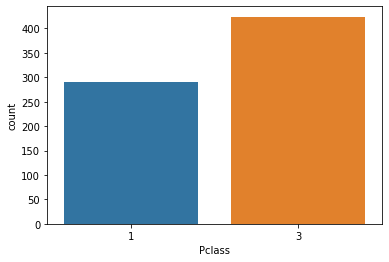

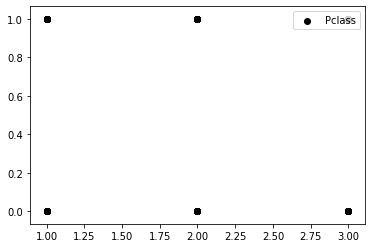

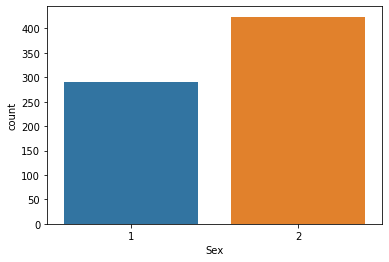

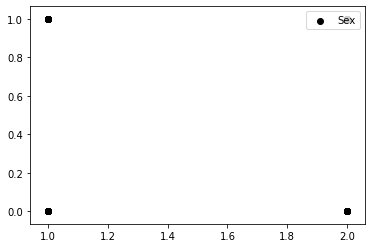

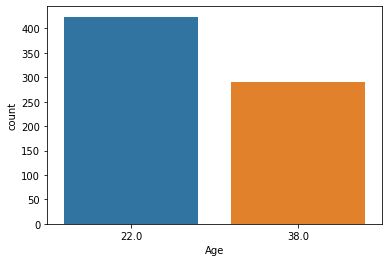

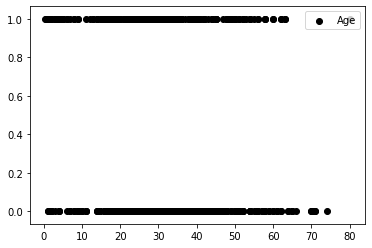

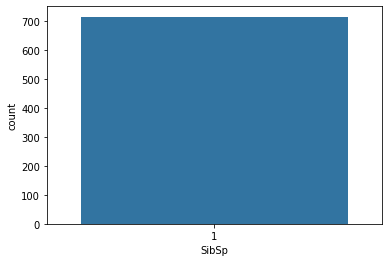

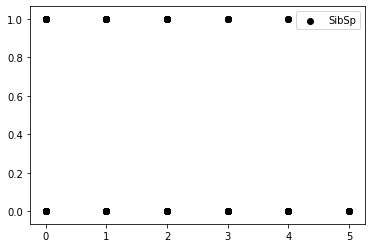

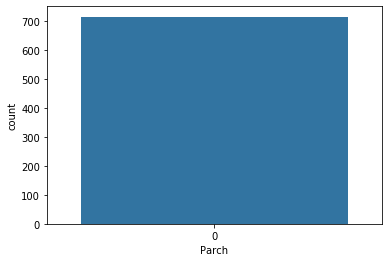

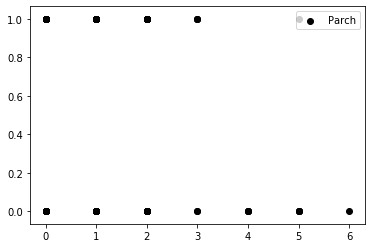

In [8]:
for col in Train_Data.columns:
    #plt.bar(Train_Data.loc[:,col], Train_Data.loc[:,'Survived'])
    ax = sns.countplot(x = Train_Data['Survived'], data = Train_Data[col])
    plt.show()

    plt.scatter(Train_Data.loc[:,col], Train_Data.loc[:,'Survived'], color = 'black')
    plt.legend([col],loc = 'upper right')
    plt.show()

# Plotting Heatmap to see the correlation between features.

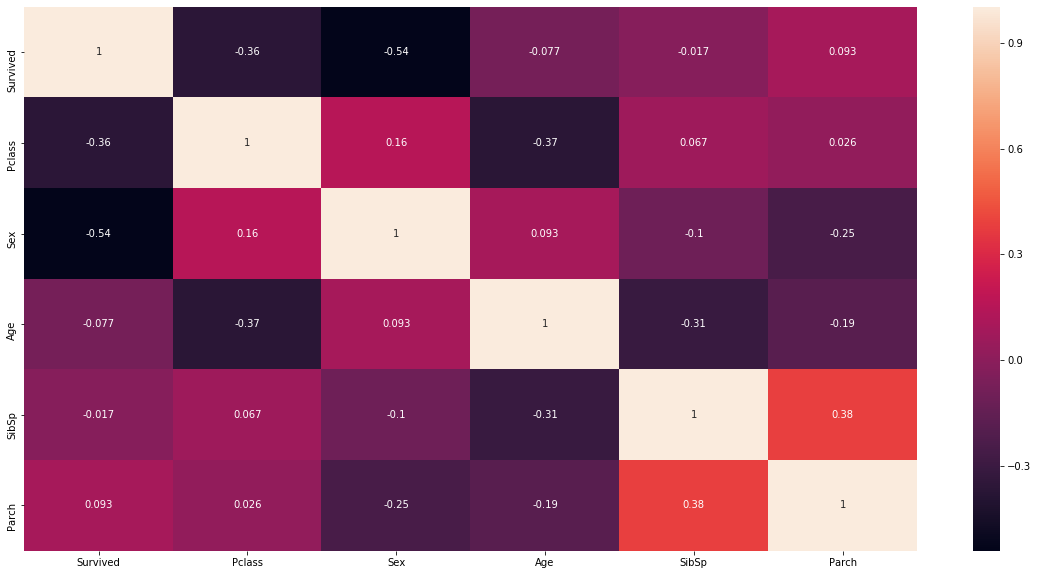

In [9]:
def Heat(Datax):
    corelate = Datax.corr()
    fig, ax = plt.subplots(figsize = (20,10))
    ax = sns.heatmap(corelate, annot = True)
    plt.show()
Heat(Train_Data)

## Checking Data again to coss validate the changes made.

In [10]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null int64
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
dtypes: float64(1), int64(5)
memory usage: 59.0 KB


In [11]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       332 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
dtypes: float64(1), int64(4)
memory usage: 16.4 KB


# Since Testing Data has some nan values, so lets will fill those nan values using last non-null method.

In [12]:
for i in range(len(Test_Data)):
    if(str(Test_Data.loc[i,'Age']) == 'nan'):
        Test_Data.loc[i,'Age'] = Test_Data.loc[i-1,'Age']

In [13]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
dtypes: float64(1), int64(4)
memory usage: 16.4 KB


## Dividing Data into Features and Target variable

In [14]:
X_Train = pd.DataFrame(Train_Data)
X_Train = X_Train.drop(['Survived'],axis = 1)
Y_Train = pd.DataFrame(Train_Data['Survived'])

X_Test = pd.DataFrame(Test_Data)

## Splitting Testing and Training Data within Training Data.

In [15]:
x_train, x_test, y_train, y_test = train_test_split( X_Train, Y_Train, test_size = 0.2, random_state = 0)

# Training Logistic Regression Model using 80% of Training Data

In [16]:
model = LogisticRegression(random_state = 0) 
model.fit(x_train, y_train) 

C:\Users\nabhr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nabhr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
Y_Train_Test = model.predict(x_test)
model.score(x_test,y_test)

0.8321678321678322

## Accuracy on Train_Test Data is 83.2%.

In [18]:
Y1_Test = model.predict(X_Test)
Y1_Test = Y1_Test.reshape(-1, 1)

## Since we have pretty good accuracy of  . We can now train a model with whole Training Data

In [19]:
modelt = LogisticRegression(random_state = 0)
modelt.fit(X_Train, Y_Train)

C:\Users\nabhr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nabhr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting Target Variable for Testing Data.

In [20]:
Y_Pred = modelt.predict(X_Test)
Y2_Test = modelt.predict(X_Test)
print(Y2_Test)
Y2_Test = Y2_Test.reshape(-1, 1)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 1 0 0 0]


## Comparing Predictions done by model trained with 80% Training Data and 100% Training Data

In [21]:
c = 0
for i in range(len(Y1_Test)):
    if(Y1_Test[i] == Y2_Test[i]):
        c = c + 1
print('Number of different Predictions',len(Y1_Test) - c)
print('Total Predictions',len(Y2_Test))

Number of different Predictions 5
Total Predictions 418


# Out of 418 instances, 5 were predicted differently and 413 instances were predicted same by both models